## 1. Khai báo thư viện

In [38]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter('ignore')

## 2. Đọc dữ liệu 

In [39]:
df = pd.read_csv('C:/Users/admin/LTKHDL_2024/Data/car_detail_en(update).csv', encoding = 'utf-8', encoding_errors= 'ignore')
df.head(5)

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,transmission,drive_type,fuel_consumption,describe,brand,grade,year_of_manufacture,car_name,price,url
0,17042,Domestic assembly,New car,Truck,0 Km,White,gray,2,2,Petrol\t1.0 L,Manual,RFD - Rear-wheel drive,L/100Km,Super Carry Truck 5-pound mezzanine is equipp...,Suzuki,Super Carry Truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,249000000,https://bonbanh.com/xe-suzuki-super_carry_truc...
1,53794,Imported,New car,SUV,0 Km,Black,Black,5,7,Petrol\t3.4 L,Automatic,AWD - 4-wheel drive (AWD),10\tL/100Km,"New Toyota LANDCRUISER 300, imported from Japa...",Toyota,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,4286000000,https://bonbanh.com/xe-toyota-land_cruiser-3.5...
2,73954,Domestic assembly,New car,Crossover,0 Km,Silver,Brown,5,8,Petrol\t2.0 L,Automatic,RFD - Rear-wheel drive,L/100Km,**Registration fee support worth 15 million VN...,Toyota,Innova,2023.0,Toyota Innova G 2.0 AT 2023 car,885000000,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...
3,74150,Imported,New car,SUV,0 Km,White,Black,5,5,Petrol\t1.8 L,Automatic,FWD - Front-wheel drive,L/100Km,"2 interior colors: black, red brown - Car ava...",Toyota,Corolla Cross,2023.0,Toyota Corolla Cross 1.8G 2023,754000000,https://bonbanh.com/xe-toyota-corolla_cross-1....
4,87573,Domestic assembly,New car,Crossover,0 Km,Silver,gray,5,8,Petrol\t2.0 L,Automatic,RFD - Rear-wheel drive,L/100Km,Toyota Innova G 100% new Equipped with 2.0 eng...,Toyota,Innova,2022.0,Toyota Innova G 2.0 AT 2022 car,850000000,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...


## 3. Phân tích dữ liệu
### 3.1. Phân bố của giá xe

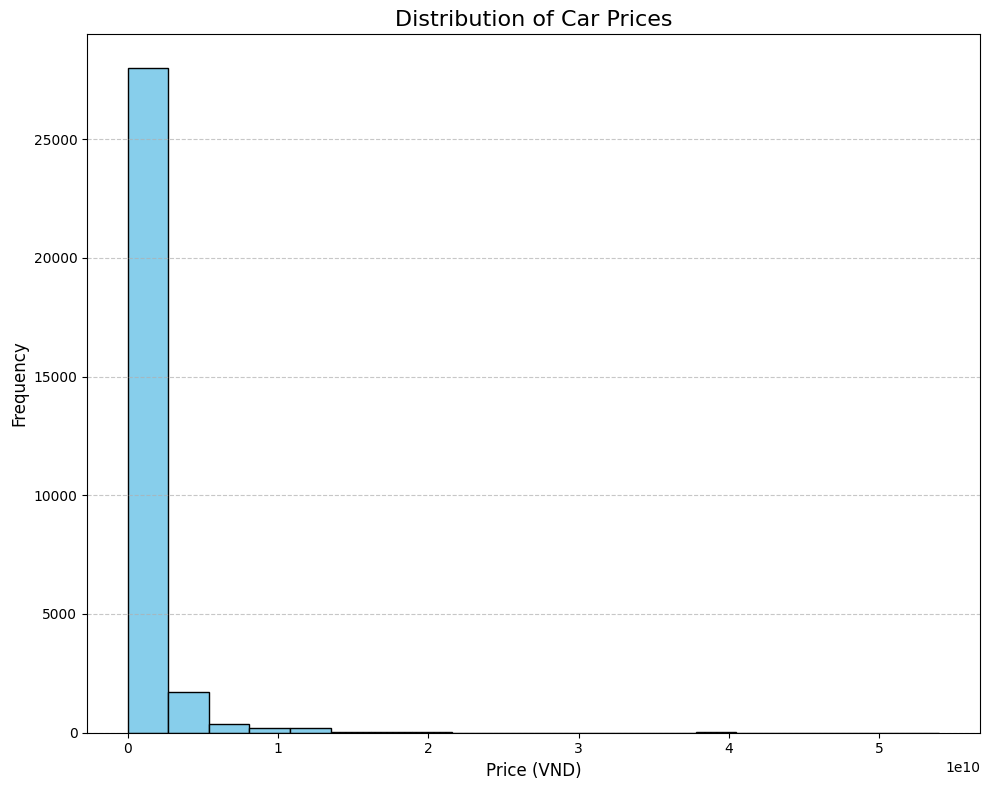

In [40]:
plt.figure(figsize=(10, 8))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price (VND)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.2. Tỷ lệ xe theo nguồn gốc (origin)

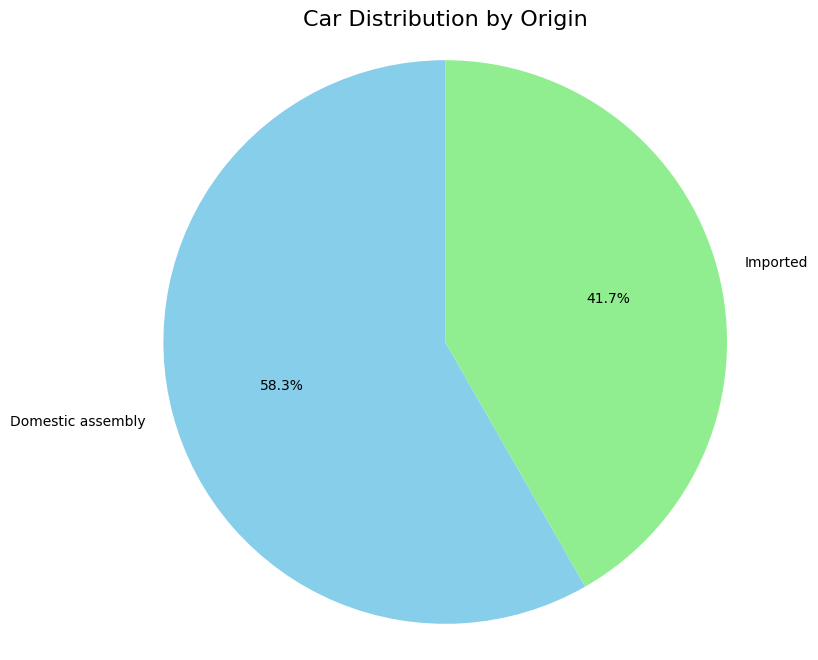

In [41]:
# Visualize the pie chart for the distribution of cars by origin
plt.figure(figsize=(8, 8))

# Count the occurrences of each origin
origin_counts = df['origin'].value_counts()

# Plot the pie chart
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Car Distribution by Origin', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.show()

### 3.3. Phân bố số lượng xe theo trạng thái cũ/mới

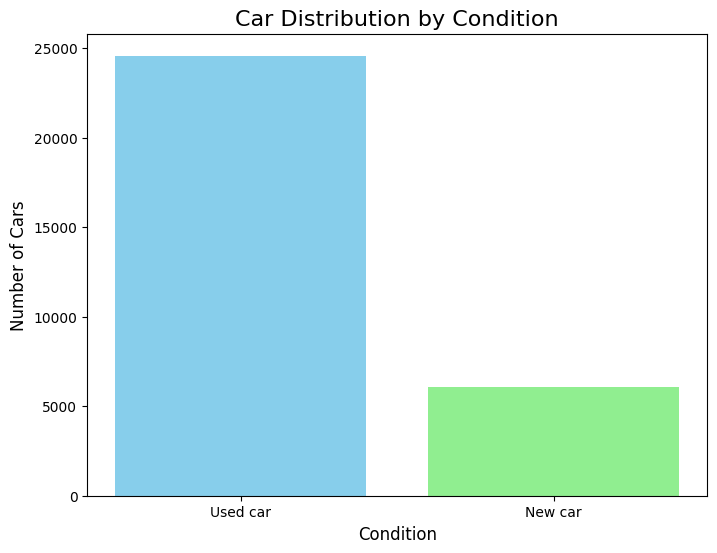

In [42]:
# Visualize the distribution of cars by condition ("New car", "Used car")
plt.figure(figsize=(8, 6))

# Count the occurrences of each condition
condition_counts = df['condition'].value_counts()

# Plot the bar chart
plt.bar(condition_counts.index, condition_counts.values, color=['skyblue', 'lightgreen'])
plt.title('Car Distribution by Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

plt.show()

### 3.4. Mẫu xe có giá cao nhất hoặc thấp nhất.

In [43]:
highest_price_car = df.loc[df['price'].idxmax()]
lowest_price_car = df.loc[df['price'].idxmin()]

print(f"Xe có giá cao nhất: {highest_price_car['car_name']} - {highest_price_car['price']}")
print(f"Xe có giá thấp nhất: {lowest_price_car['car_name']} - {lowest_price_car['price']}")

Xe có giá cao nhất: Ferrari SF90 Stradale 4.0 V8 2020 car - 54000000000
Xe có giá thấp nhất: Hyundai SantaFe Standard 2.5L 2022 - 0


### 3.5. Trung bình giá theo từng loại xe (car_model) hoặc theo thương hiệu (brand)
- Theo loại xe (car_model)

In [44]:
avg_price_by_model = df.groupby('car_model')['price'].mean()
print(avg_price_by_model)

car_model
Bán tải / Pickup       6.894354e+08
Convertible/Cabriolet    4.675602e+09
Coupe                    4.388606e+09
Crossover                6.259440e+08
Hatchback                3.329511e+08
SUV                      1.730285e+09
Sedan                    1.023241e+09
Truck                    4.282094e+08
Van/Minivan              9.317905e+08
Wagon                    8.310000e+08
Name: price, dtype: float64


- Theo thương hiệu (brand)

In [45]:
avg_price_by_brand = df.groupby('brand')['price'].mean()
print(avg_price_by_brand)

brand
Acura           4.564118e+08
Aston Martin    5.000000e+09
Audi            1.573397e+09
BMW             1.788150e+09
BYD             7.550000e+07
                    ...     
VinFast         6.753426e+08
Vinaxuki        4.983333e+07
Volkswagen      1.420758e+09
Volvo           2.437677e+09
Zotye           4.472000e+08
Name: price, Length: 76, dtype: float64


### 3.5. Biểu đồ cột so sánh giá trung bình theo loại xe.

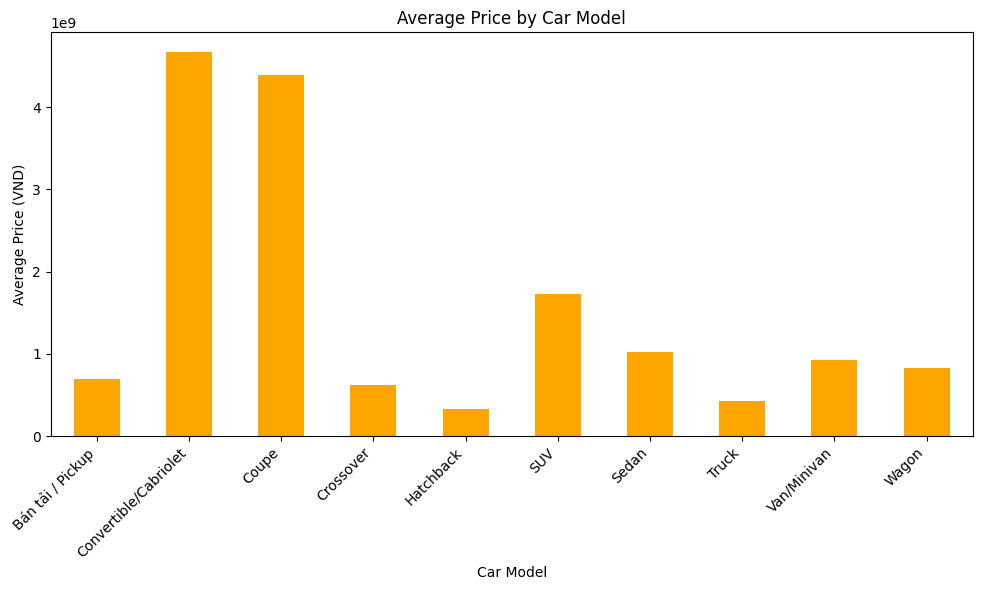

In [48]:
avg_price_by_model = df.groupby('car_model')['price'].mean()


plt.figure(figsize=(10, 6))
avg_price_by_model.plot(kind='bar', color='orange')
plt.title('Average Price by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Average Price (VND)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.6. Biểu đồ cột so sánh giá trung bình của các thương hiệu.

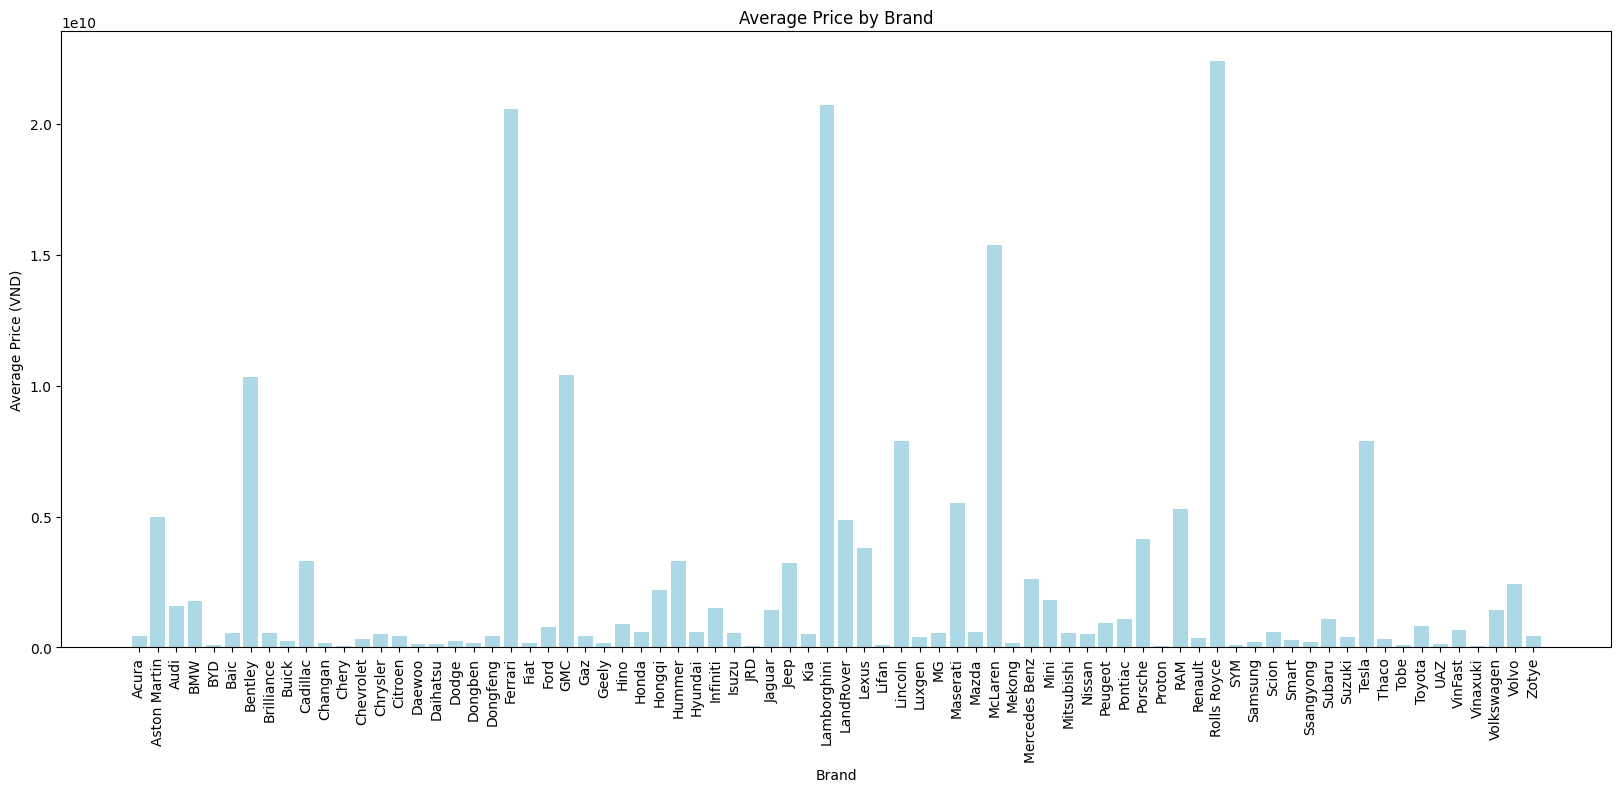

In [47]:
avg_price_by_brand = df.groupby('brand')['price'].mean()

plt.figure(figsize=(20, 8))

plt.bar(avg_price_by_brand.index, avg_price_by_brand.values, color='lightblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (VND)')
plt.xticks(rotation=90)  
plt.show()

### 3.7. Phân tích tương quan
- Ta có thể sử dụng ma trận tương quan để xác định mối quan hệ giữa các biến trong dữ liệu. Điều này có thể giúp ta hiểu các yếu tố nào ảnh hưởng đến giá của xe, ví dụ như năm sản xuất, số lượng cửa, hoặc dung tích động cơ.
- Sử dụng heatmap để trực quan hóa ma trận tương quan:



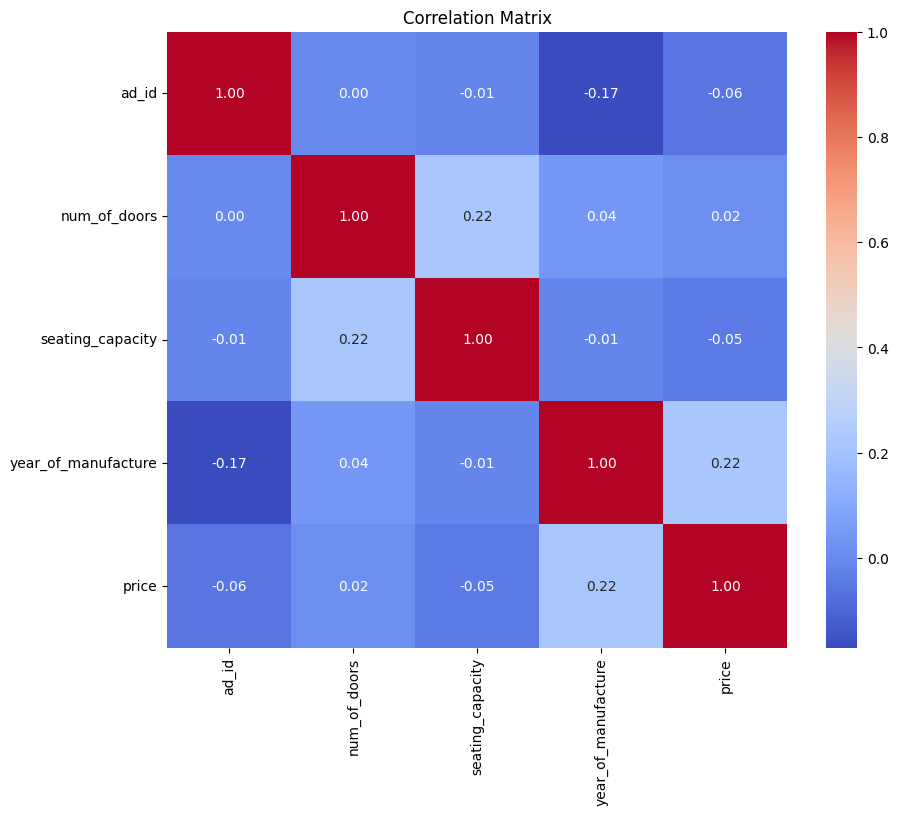

In [50]:
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 3.8. Gom nhóm dựa trên các đặc tính như giá, số kilomet đã đi

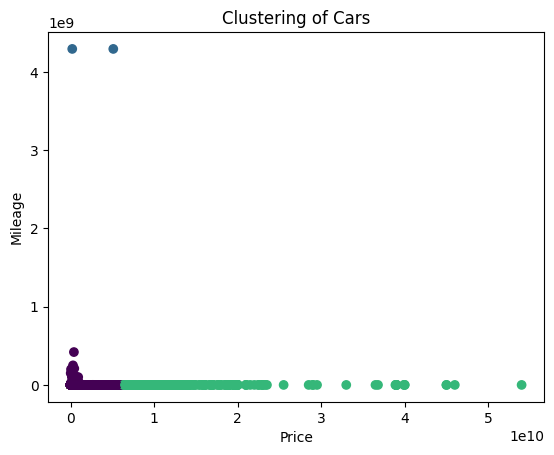

In [58]:
from sklearn.cluster import KMeans

df['mileage'] = df['mileage'].astype(str)

# Loại bỏ dấu phẩy (nếu có)
df['mileage'] = df['mileage'].str.replace(',', '')

# Lấy chỉ phần số từ chuỗi
df['mileage'] = df['mileage'].str.extract('(\d+)', expand=False)

# Chuyển cột về kiểu dữ liệu số (float)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# Thay thế NaN bằng 0
df['year_of_manufacture'].fillna(0, inplace=True)


# Chọn các đặc tính để phân nhóm
features = df[['price', 'year_of_manufacture', 'mileage']]  # Ví dụ chọn các cột này

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Áp dụng KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Hiển thị các nhóm
plt.scatter(df['price'], df['mileage'], c=df['cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering of Cars')
plt.show()